In [13]:
from math import log
from copy import deepcopy
import numpy as np
from sklearn.preprocessing import normalize
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [128]:
class AdaBoost:

    def __init__(self, classifier, n):
        def runClear():
            self.classifiers =  [deepcopy(classifier) for i in range(n)]
            self.bs = np.array([])
        self.clear = runClear
        self.clear()

    def fit(self, X, y):
        self.clear()

        l = len(X)
        w = np.repeat(1.0 / l, l)

        for c in self.classifiers:
            c.fit(X, y, sample_weight=w)
            yPredicted = c.predict(X)
            N = sum([w[i] for i in range(l) if y[i] != yPredicted[i]])

            eps = 1e-9
            if N < eps or N > 1 - eps:
                self.classifiers = np.array([c])
                self.bs = [1.0 if N < eps else -1.0]
                break

            b = 0.5 * log((1.0 - N) / N)
            self.bs = np.append(self.bs, b)

            w = np.multiply(w, np.exp(-b * np.multiply(y, yPredicted)))
            w /= np.sum(w)
            
    def predict(self, X):
        preds = np.zeros(len(X))
        for i in range(len(self.bs)):
            preds += self.bs[i] * self.classifiers[i].predict(X)
        return np.sign(preds)

In [118]:
def readDataset(filename):
    df = pd.read_csv(filename)
    X = df[['x', 'y']].to_numpy()
    y = np.array([1.0 if c == 'P' else -1.0 for c in df['class'].to_numpy()])
    return X, y

In [119]:
XGeyser, yGeyser = readDataset('Boost/geyser.csv')

In [120]:
XChips, yChips = readDataset('Boost/chips.csv')

In [121]:
def visualize(X, y, adaboost):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    Z = adaboost.predict(xy).reshape(XX.shape)
#     print(Z)
#     print(all([all([z == -1 for z in zl]) for zl in Z]))

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    plt.show()

In [130]:
def visualizeNSteps(X, y, N, classifier):
    for n in range(1, N + 1):
        adaboost = AdaBoost(classifier, n)
        adaboost.fit(X, y)
        visualize(X, y, adaboost)

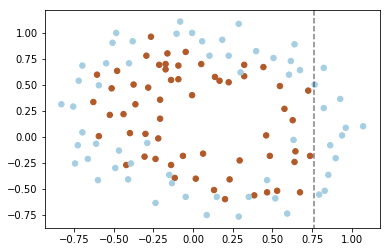

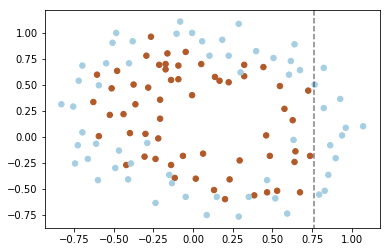

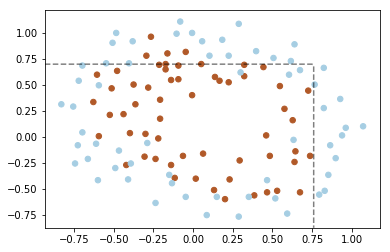

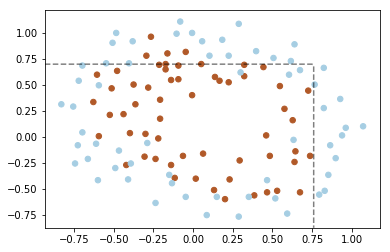

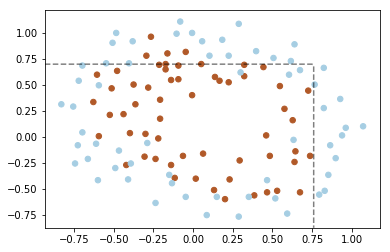

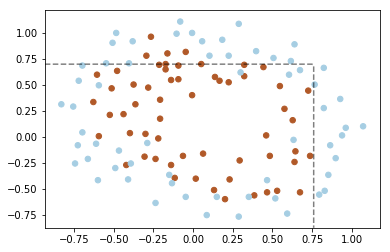

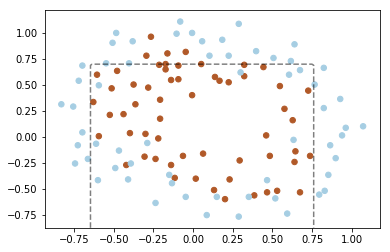

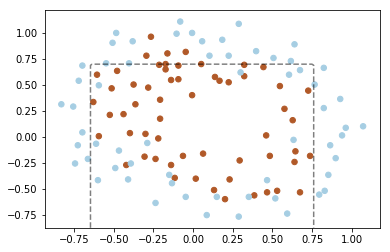

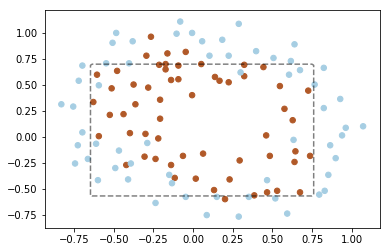

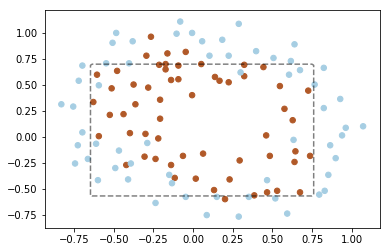

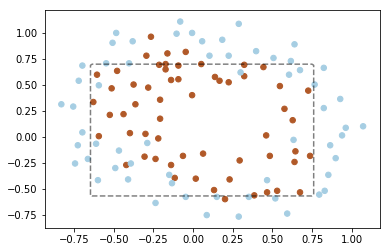

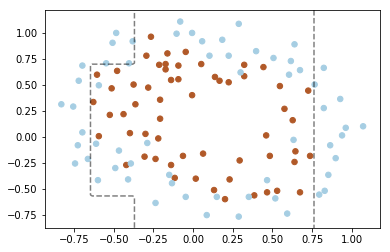

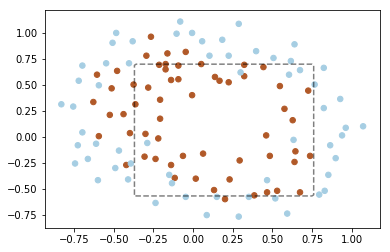

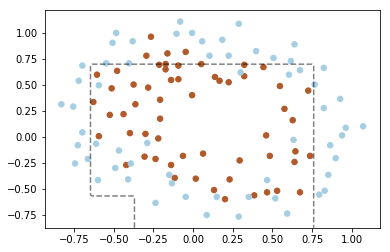

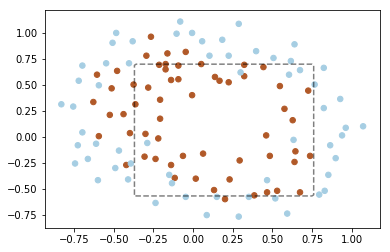

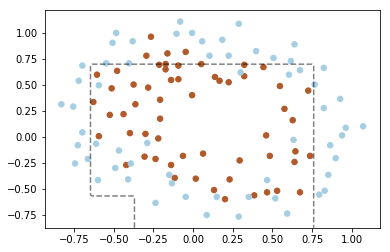

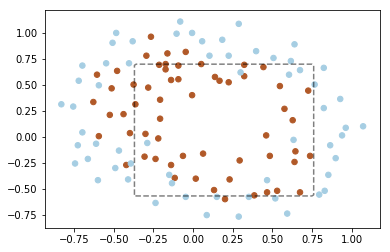

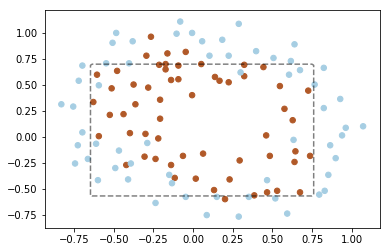

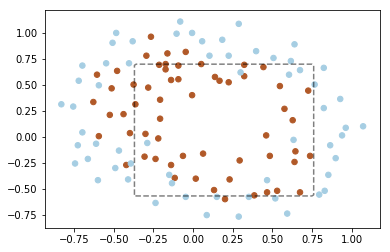

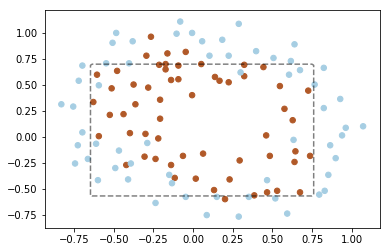

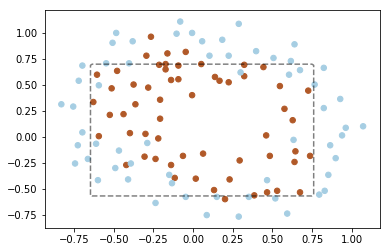

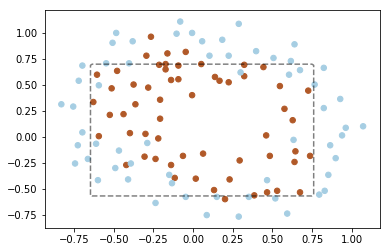

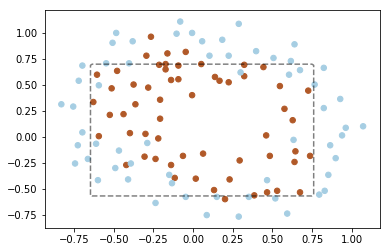

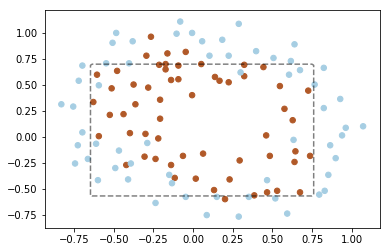

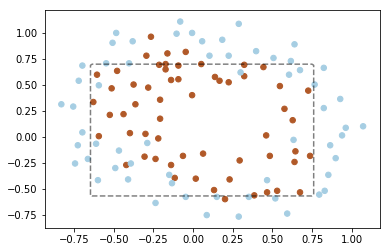

In [131]:
from sklearn.tree import DecisionTreeClassifier
visualizeNSteps(XChips, yChips, 25, DecisionTreeClassifier(max_depth=1))

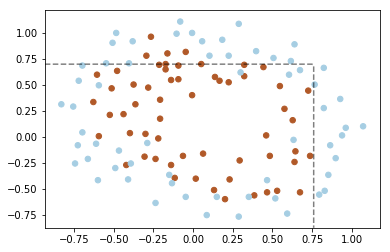

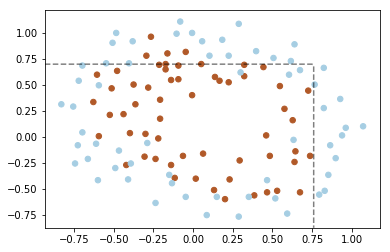

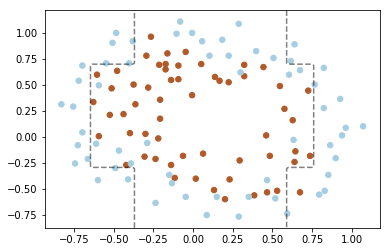

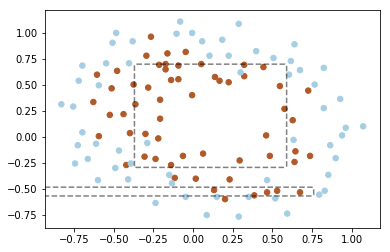

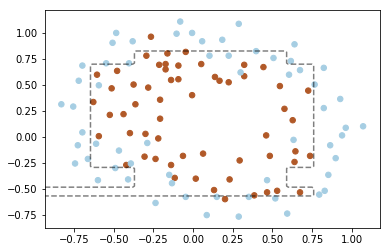

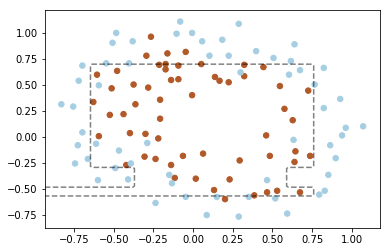

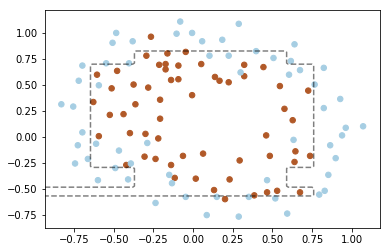

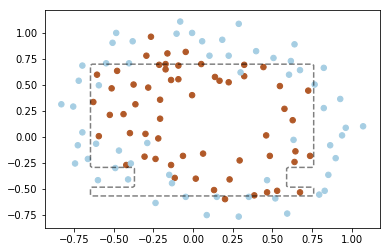

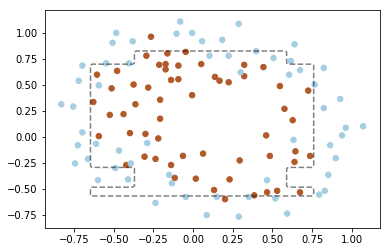

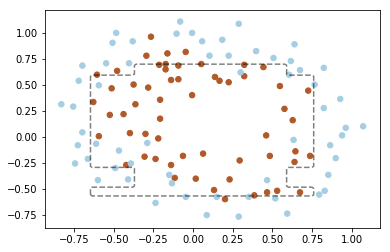

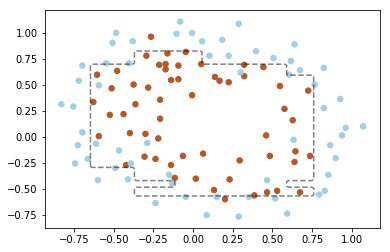

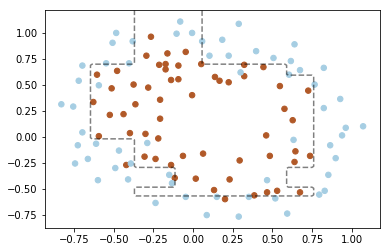

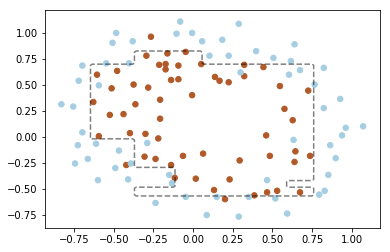

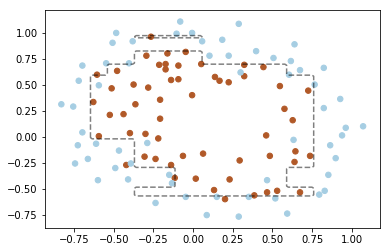

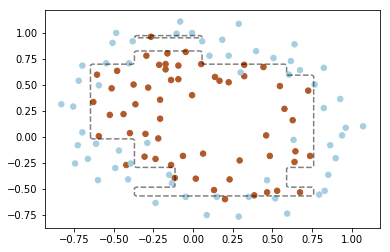

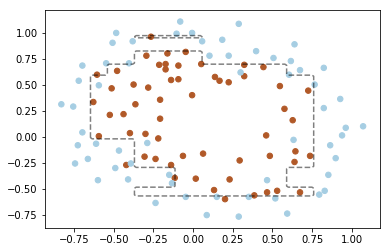

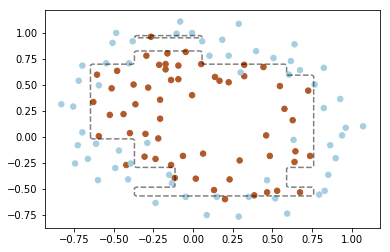

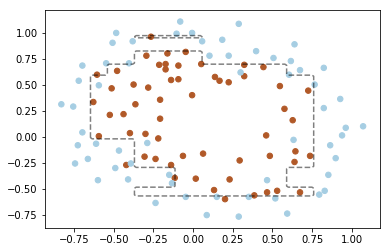

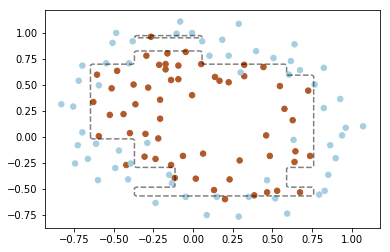

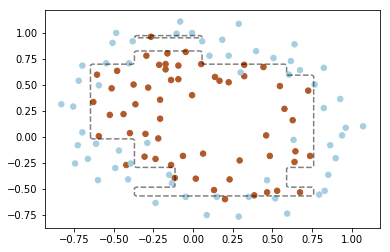

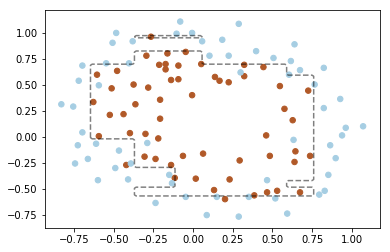

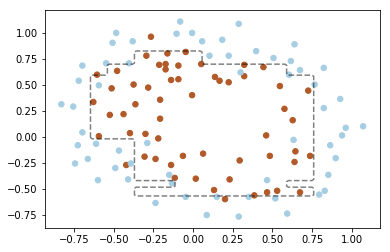

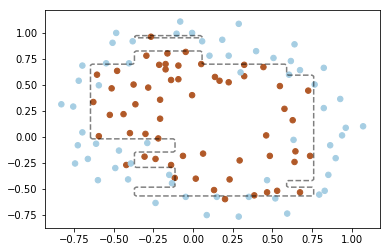

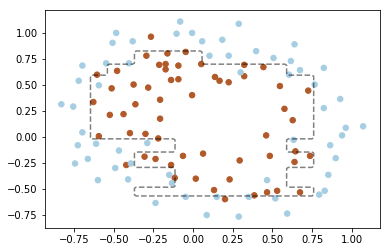

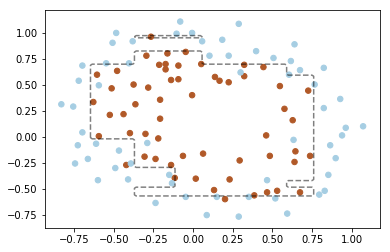

In [132]:
visualizeNSteps(XChips, yChips, 25, DecisionTreeClassifier(max_depth=2))

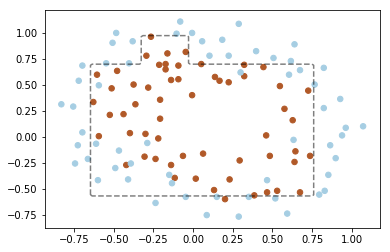

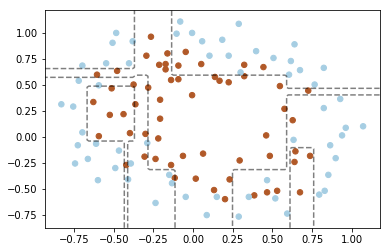

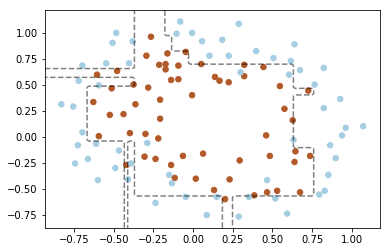

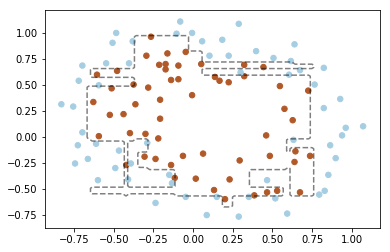

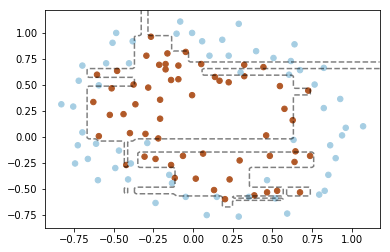

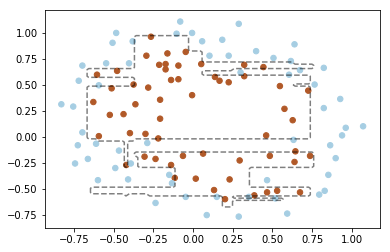

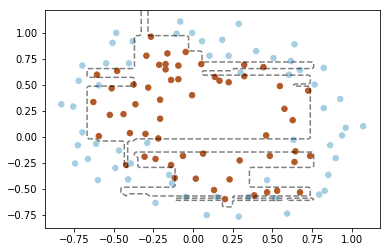

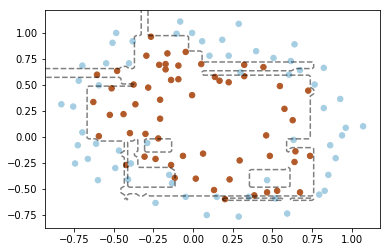

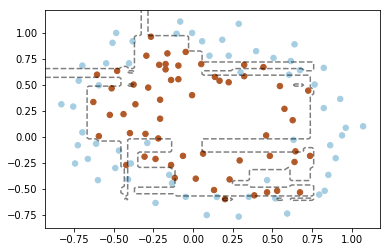

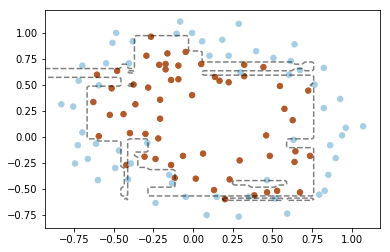

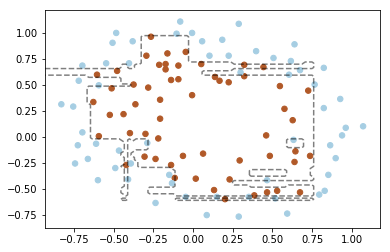

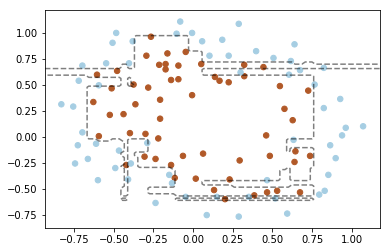

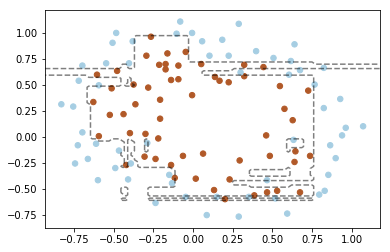

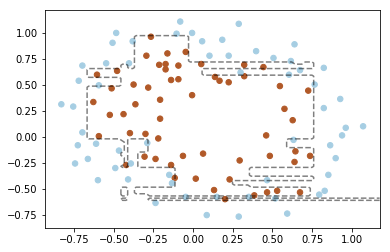

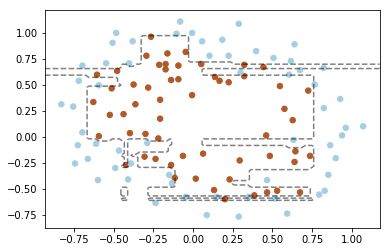

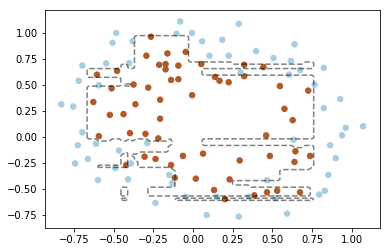

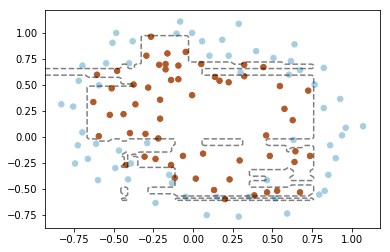

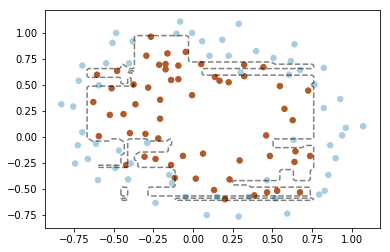

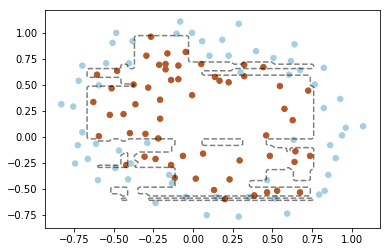

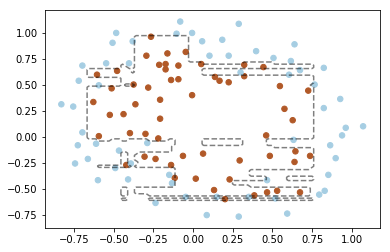

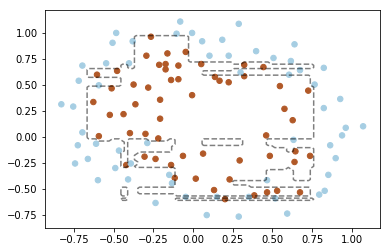

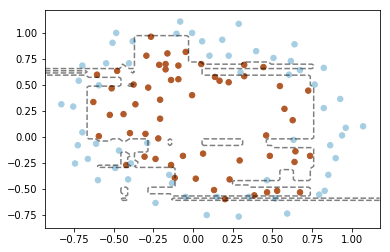

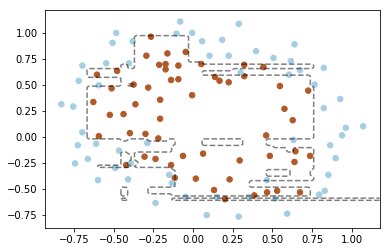

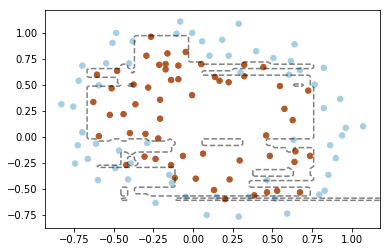

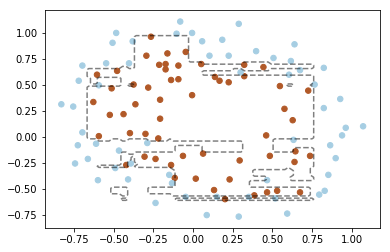

In [133]:
visualizeNSteps(XChips, yChips, 25, DecisionTreeClassifier(max_depth=5))

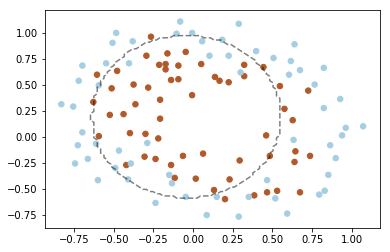

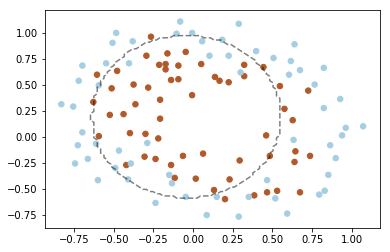

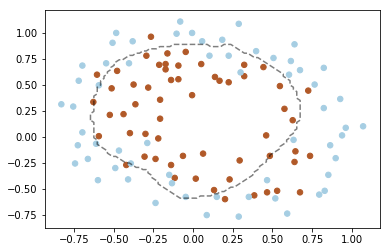

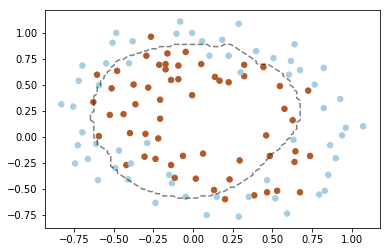

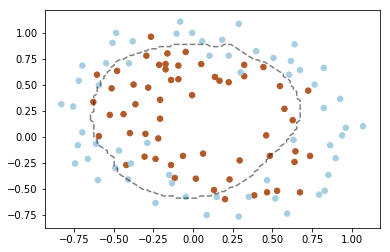

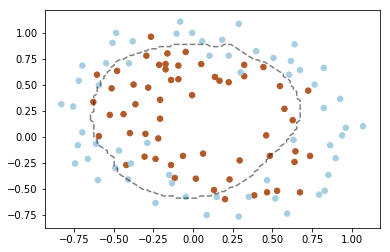

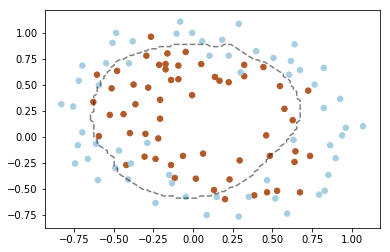

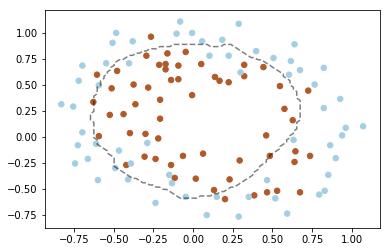

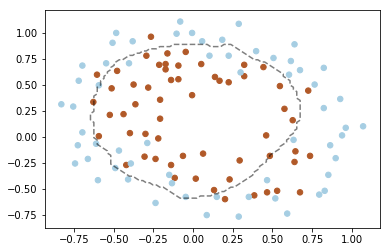

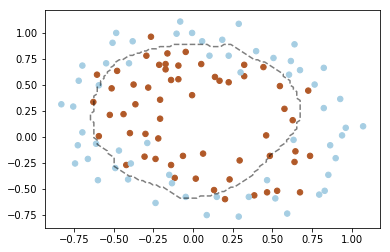

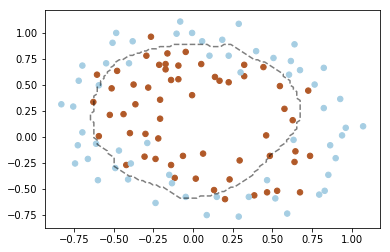

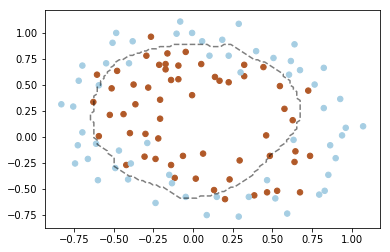

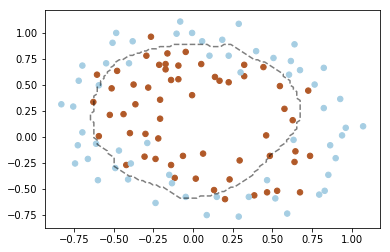

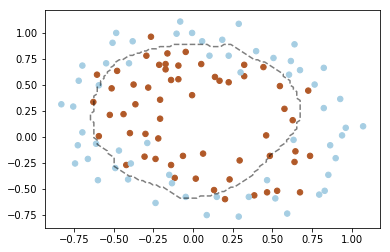

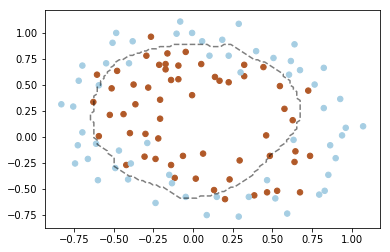

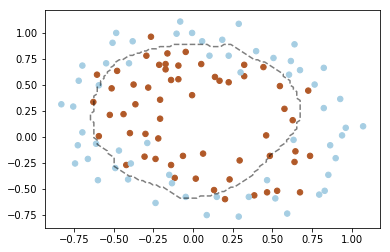

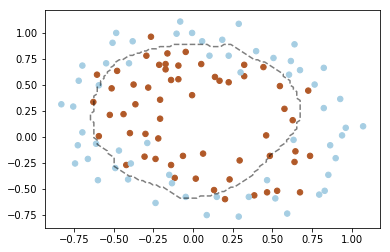

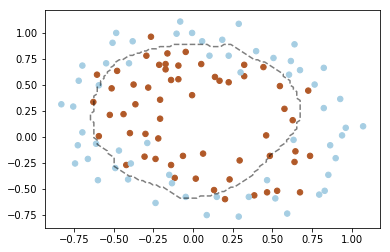

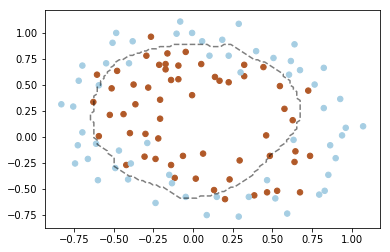

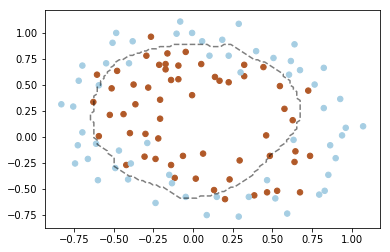

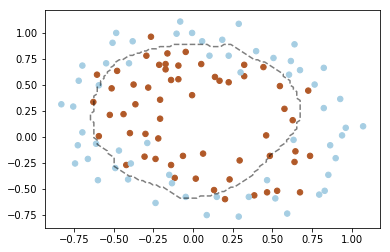

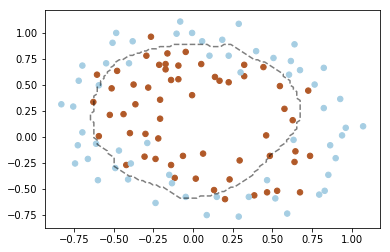

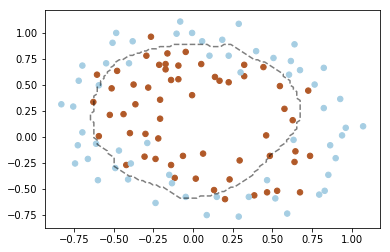

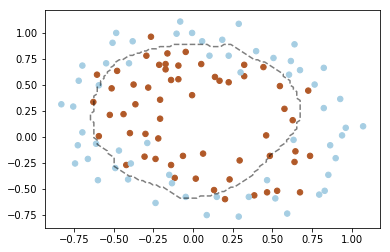

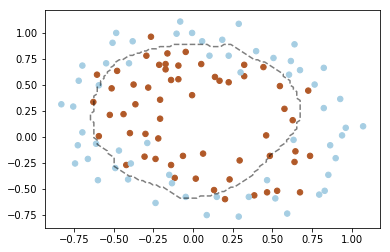

In [138]:
from sklearn.naive_bayes import GaussianNB

visualizeNSteps(XChips, yChips, 25, GaussianNB())

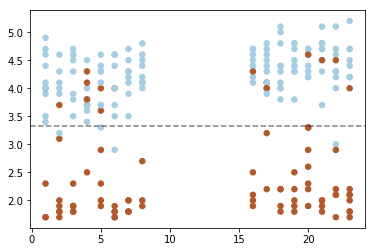

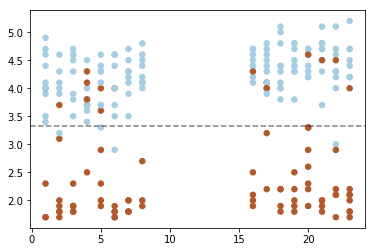

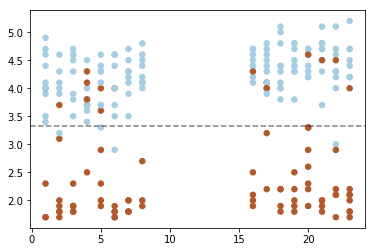

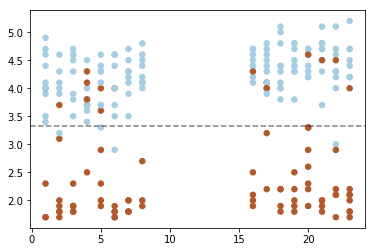

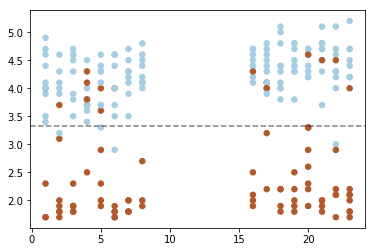

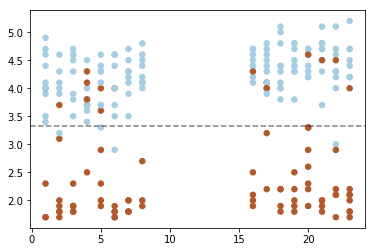

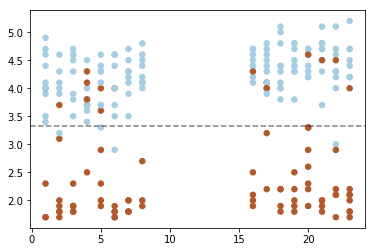

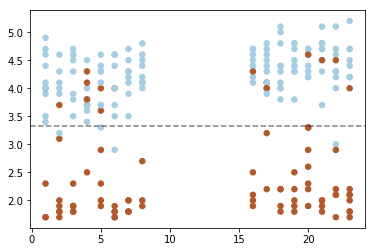

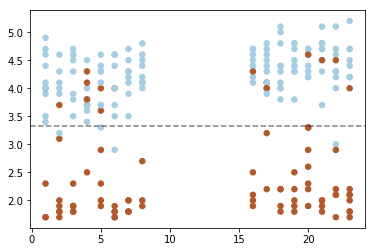

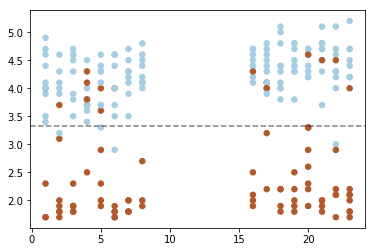

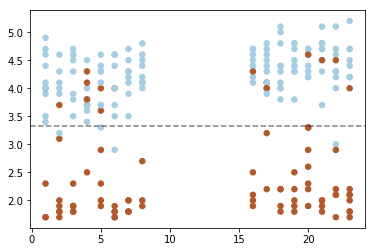

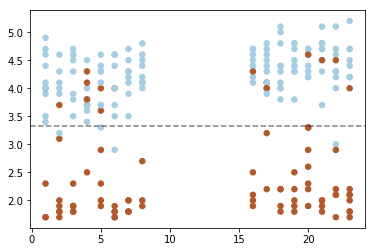

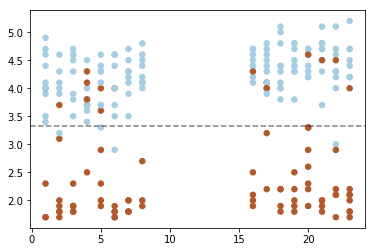

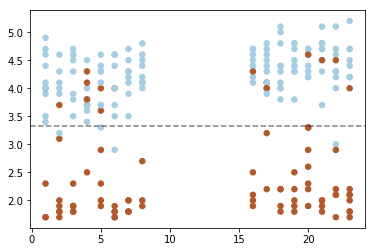

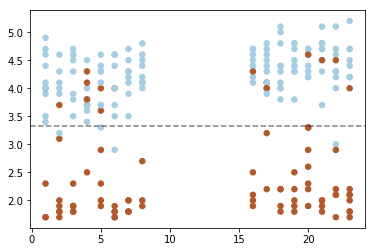

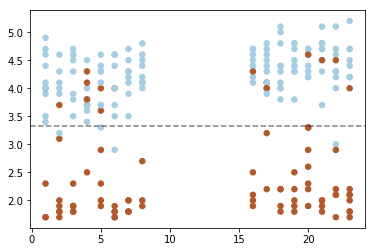

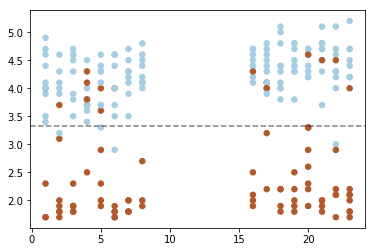

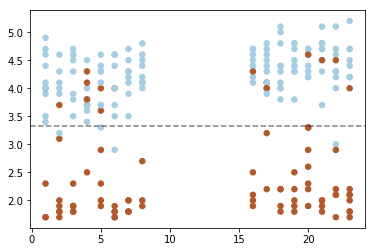

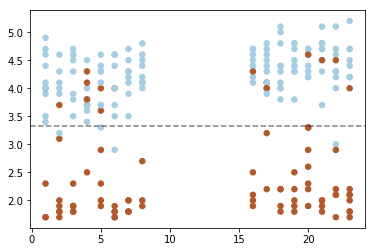

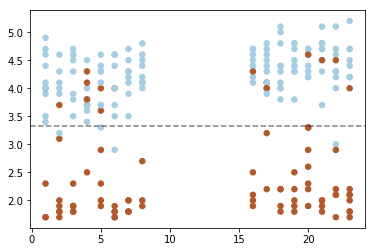

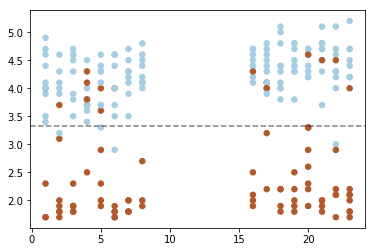

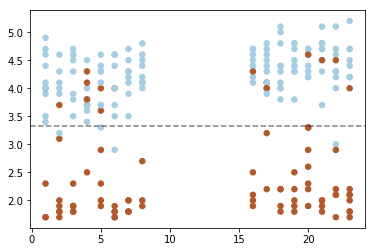

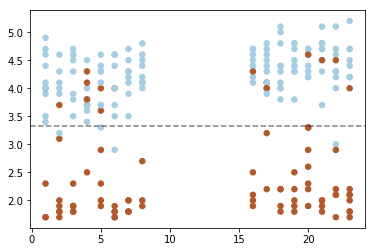

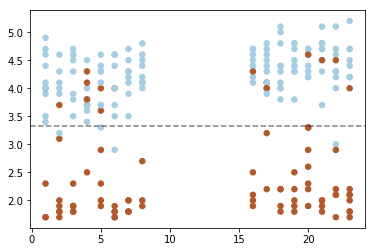

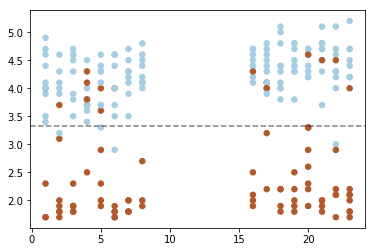

In [144]:
visualizeNSteps(XGeyser, yGeyser, 25, DecisionTreeClassifier(max_depth=1))

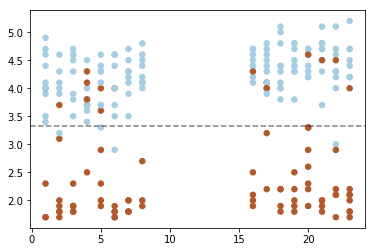

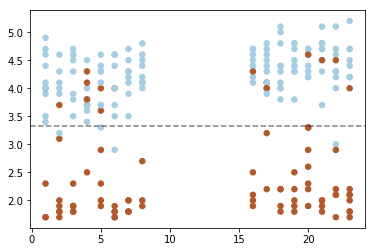

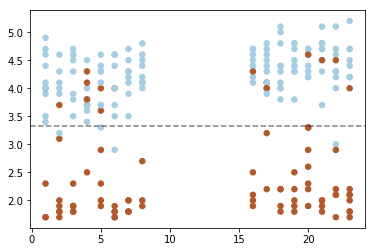

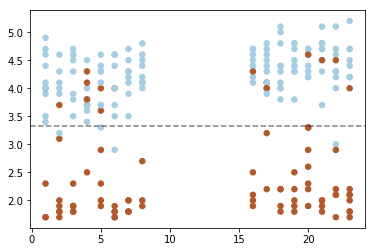

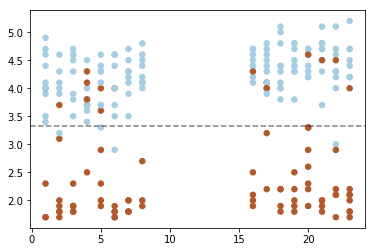

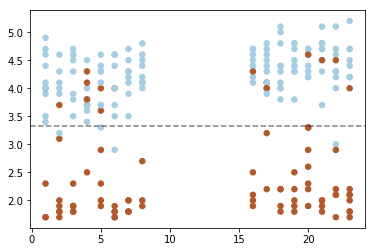

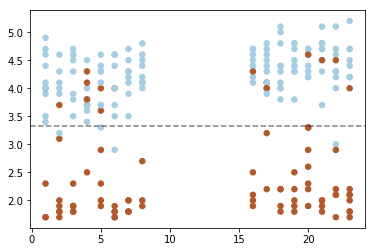

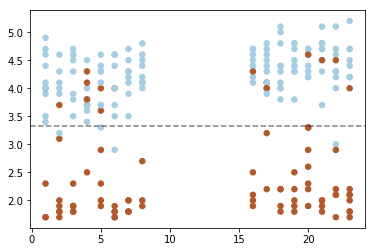

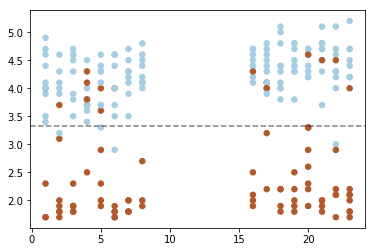

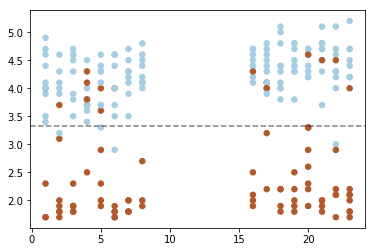

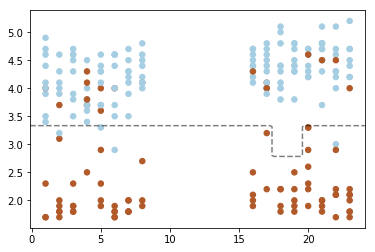

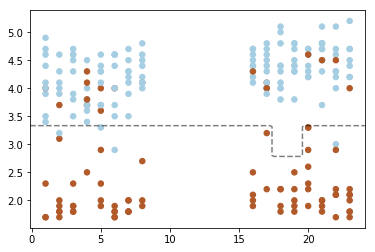

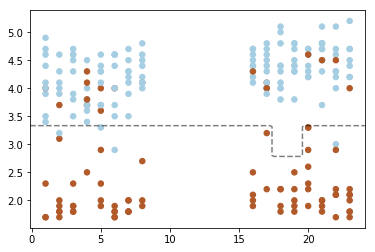

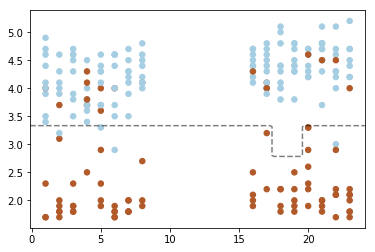

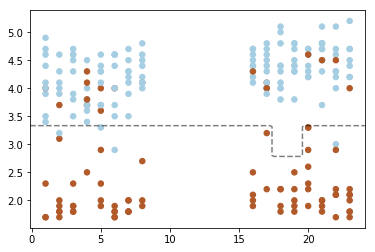

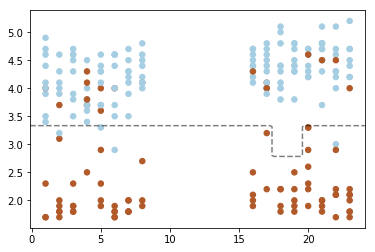

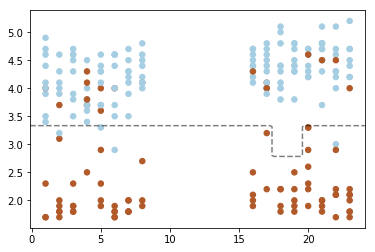

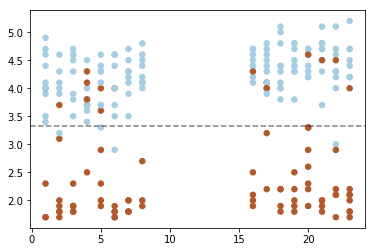

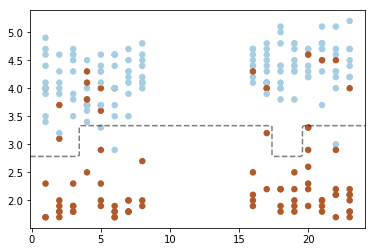

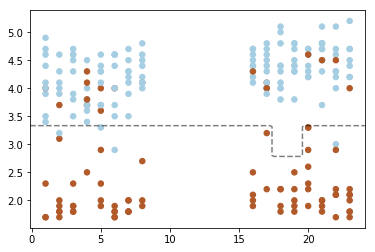

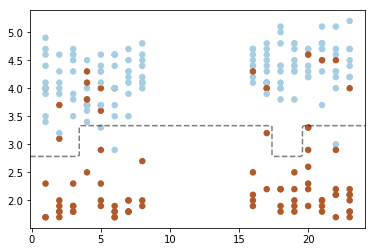

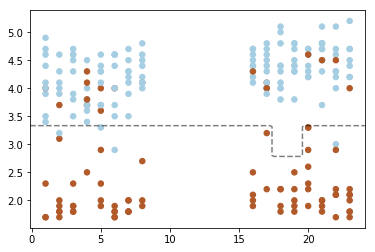

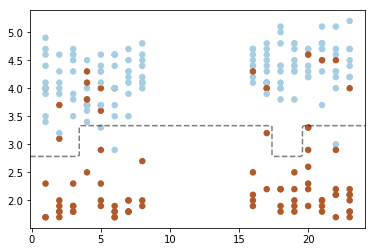

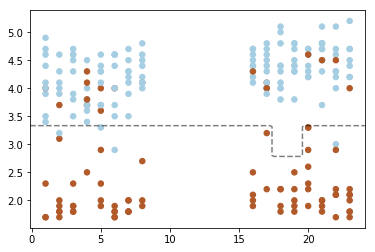

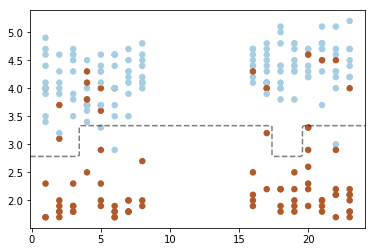

In [145]:
visualizeNSteps(XGeyser, yGeyser, 25, DecisionTreeClassifier(max_depth=2))

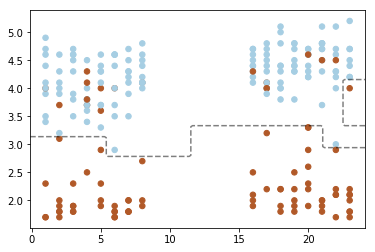

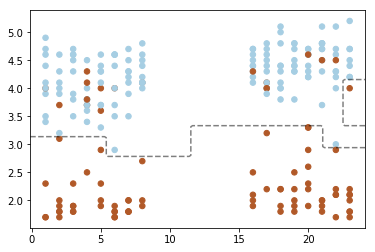

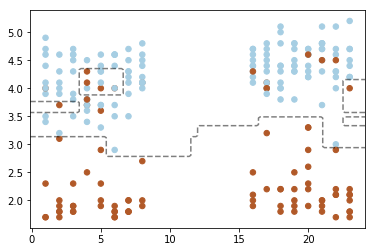

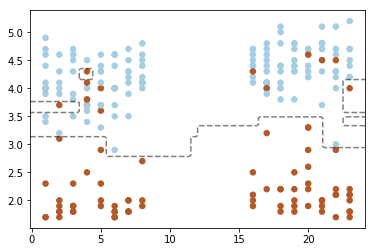

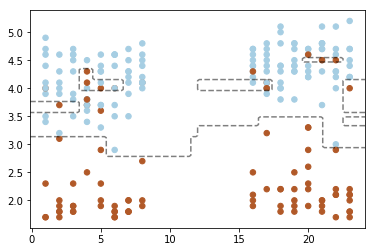

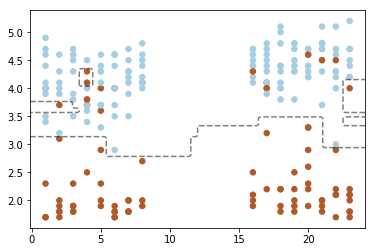

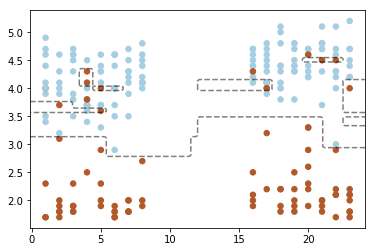

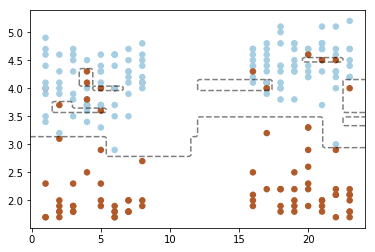

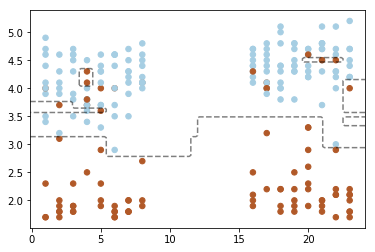

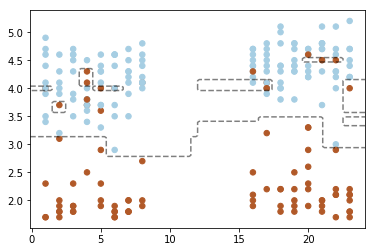

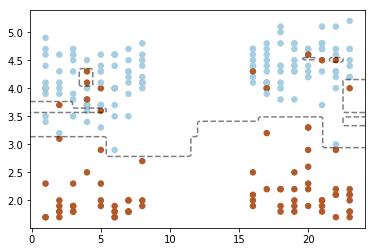

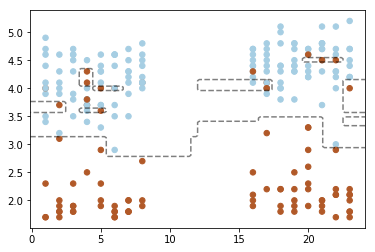

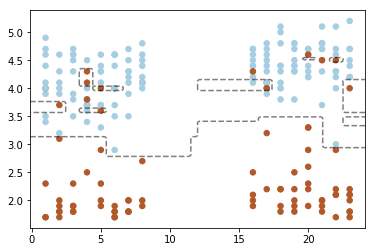

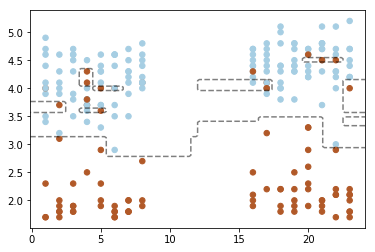

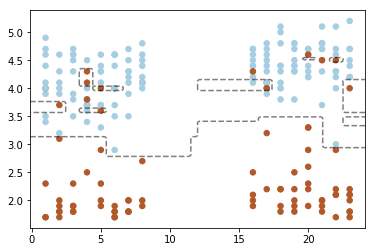

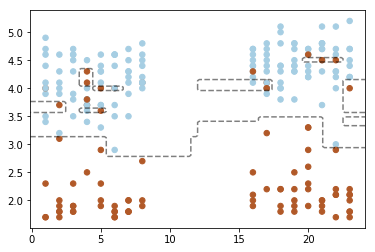

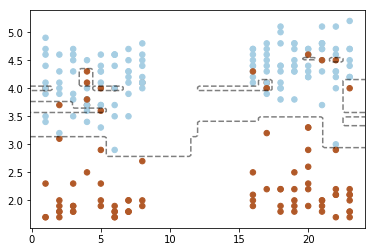

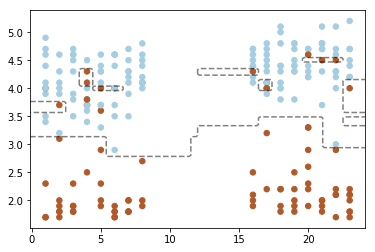

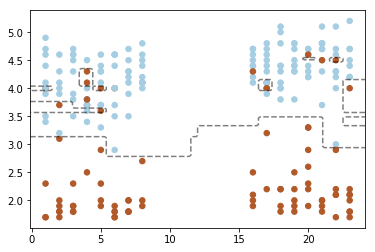

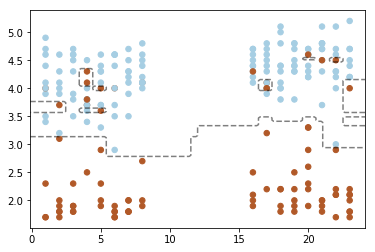

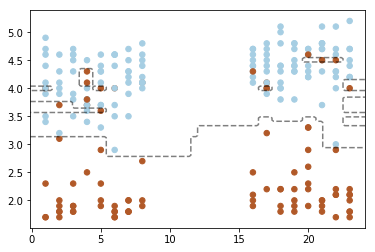

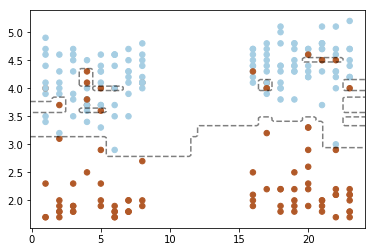

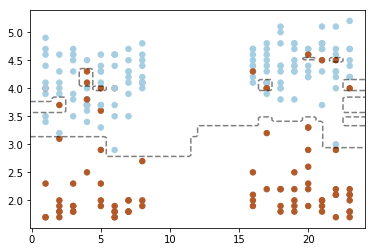

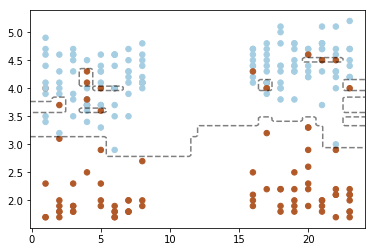

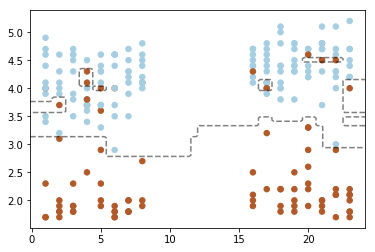

In [146]:
visualizeNSteps(XGeyser, yGeyser, 25, DecisionTreeClassifier(max_depth=5))

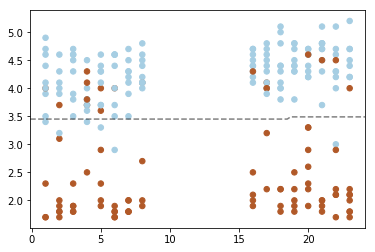

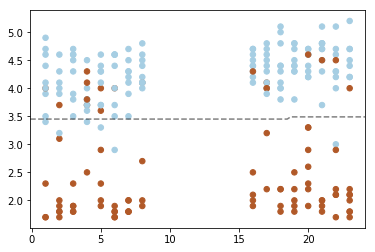

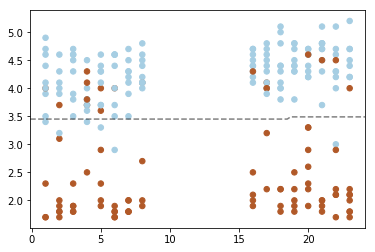

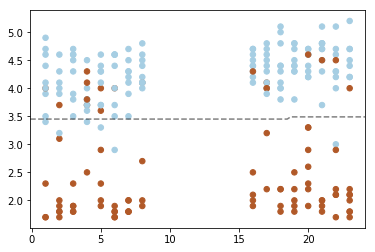

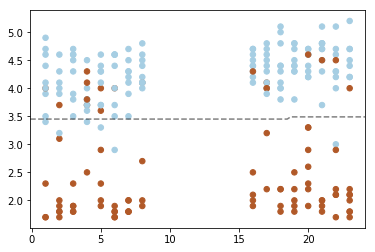

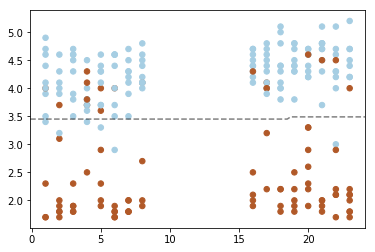

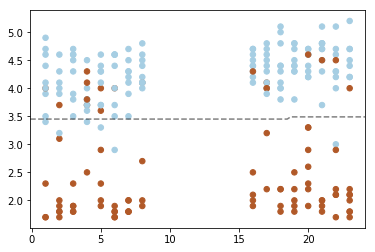

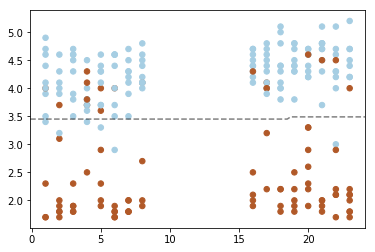

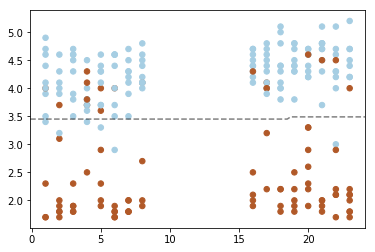

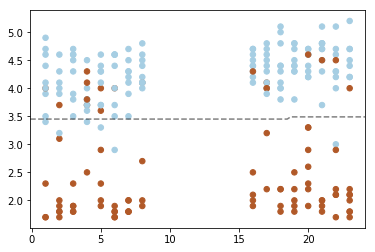

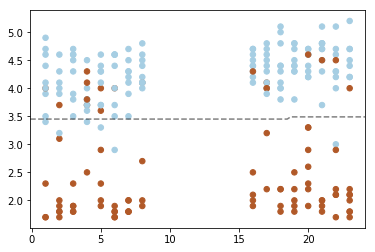

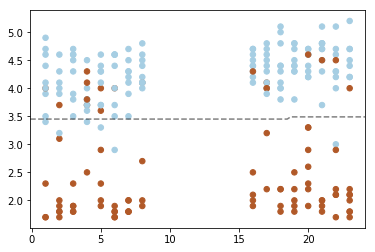

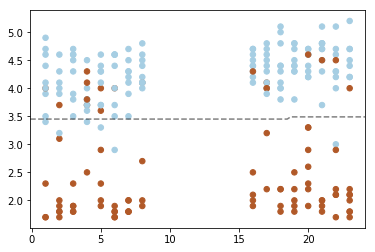

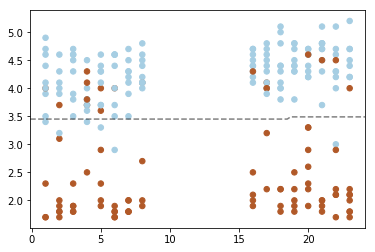

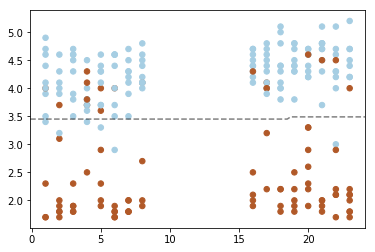

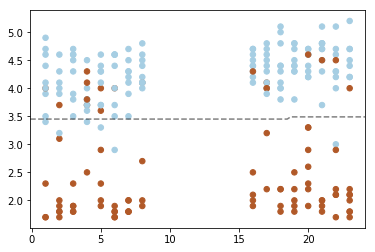

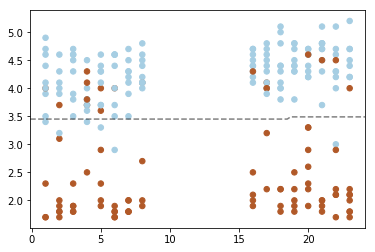

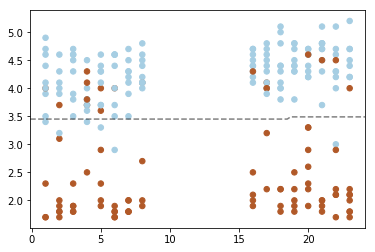

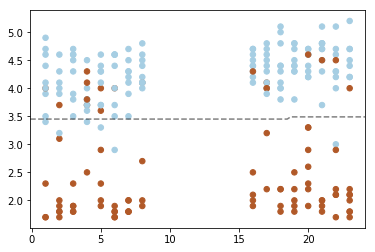

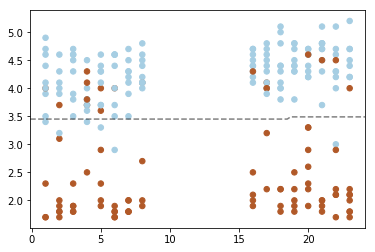

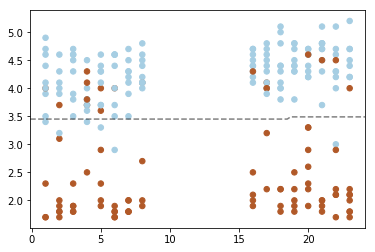

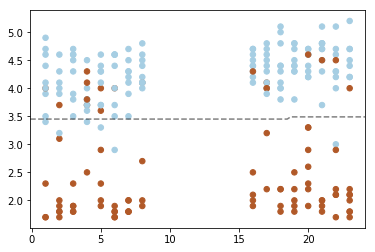

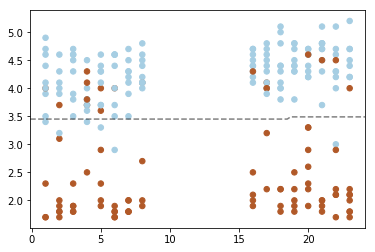

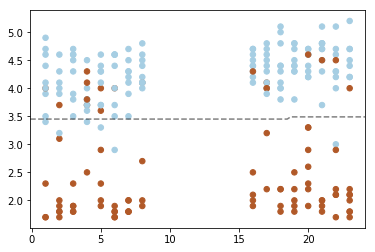

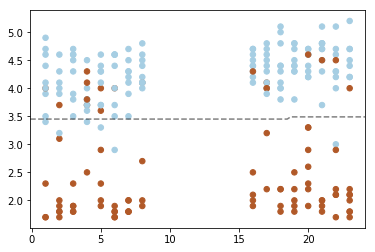

In [143]:
from sklearn.naive_bayes import GaussianNB

visualizeNSteps(XGeyser, yGeyser, 25, GaussianNB())